#### Os dados, até a data do presente estudo, estão no https://covid.saude.gov.br/
#### O presente arquivo é de 4 de novembro. Atenção: de acordo com o dia em que for feita a análise, a última barra da totalização por semana estará menor.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\HIST_PAINEL_COVIDBR_18nov2020.csv'
df = pd.read_csv(filename, delimiter=';',
                 error_bad_lines=False)

In [3]:
df.shape

(1332571, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332571 entries, 0 to 1332570
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   regiao                  1332571 non-null  object 
 1   estado                  1332303 non-null  object 
 2   municipio               1320090 non-null  object 
 3   coduf                   1332571 non-null  int64  
 4   codmun                  1325067 non-null  float64
 5   codRegiaoSaude          1320090 non-null  float64
 6   nomeRegiaoSaude         1320090 non-null  object 
 7   data                    1332571 non-null  object 
 8   semanaEpi               1332571 non-null  int64  
 9   populacaoTCU2019        1327594 non-null  float64
 10  casosAcumulado          1332571 non-null  int64  
 11  casosNovos              1332571 non-null  int64  
 12  obitosAcumulado         1332571 non-null  int64  
 13  obitosNovos             1332571 non-null  int64  
 14  Re

In [5]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1067145,Sul,SC,Lajeado Grande,42,420945.0,42003.0,XANXERE,2020-04-10,15,1427.0,0,0,0,0,NaN,NaN,0.0
278825,Nordeste,RN,Jardim do Seridó,24,240570.0,24004.0,4ª REGIAO DE SAUDE - CAICO,2020-10-06,41,12396.0,132,0,2,0,NaN,NaN,0.0
493221,Nordeste,BA,Jaguaripe,29,291780.0,29022.0,SANTO ANTONIO DE JESUS,2020-07-09,28,18788.0,52,0,2,0,NaN,NaN,0.0
664134,Sudeste,MG,Natércia,31,314440.0,31007.0,POUSO ALEGRE,2020-08-14,33,4730.0,38,0,0,0,NaN,NaN,0.0
945550,Sul,PR,Barbosa Ferraz,41,410250.0,41011.0,11ª RS CAMPO MOURAO,2020-03-27,13,11568.0,0,0,0,0,NaN,NaN,0.0
81166,Norte,AP,Santana,16,160060.0,16003.0,AREA SUDOESTE,2020-10-05,41,121364.0,8867,21,86,0,NaN,NaN,1.0
502003,Nordeste,BA,Maracás,29,292050.0,29015.0,JEQUIE,2020-07-22,30,20834.0,144,29,3,0,NaN,NaN,0.0
707315,Sudeste,MG,Santa Rosa da Serra,31,315970.0,31082.0,SAO GOTARDO,2020-09-30,40,3350.0,13,0,0,0,NaN,NaN,0.0
116544,Nordeste,MA,Alto Alegre do Maranhão,21,210043.0,21007.0,CODO,2020-04-16,16,27053.0,0,0,0,0,NaN,NaN,0.0
1061030,Sul,SC,Iporã do Oeste,42,420765.0,42001.0,EXTREMO OESTE,2020-05-27,22,8996.0,0,0,0,0,NaN,NaN,0.0


In [6]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    40927
RJ    21698
MG     9605
CE     9461
PE     8873
BA     8013
PA     6844
RS     6356
GO     6107
PR     5793
AM     4728
MA     4203
ES     4058
MT     4009
DF     3845
SC     3384
PB     3223
RN     2649
PI     2554
AL     2304
SE     2266
MS     1699
RO     1511
TO     1144
AP      783
RR      709
AC      709
Name: obitosAcumulado, dtype: int64

<AxesSubplot:ylabel='estado'>

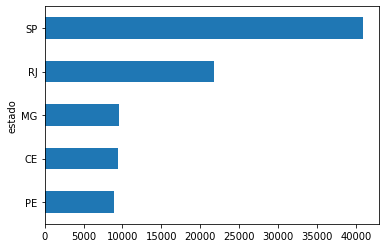

In [7]:
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(5).plot(kind='barh')

<AxesSubplot:xlabel='data'>

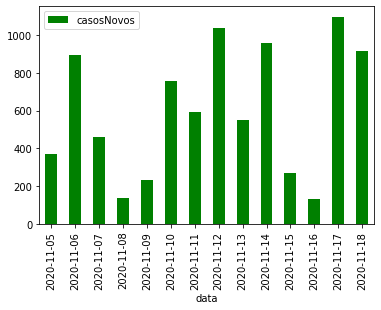

In [8]:
rj = df.query('municipio == "Rio de Janeiro"')
rj.tail(14).plot(kind='bar', 
        x='data', y='casosNovos', color='GREEN')

<AxesSubplot:xlabel='semanaEpi'>

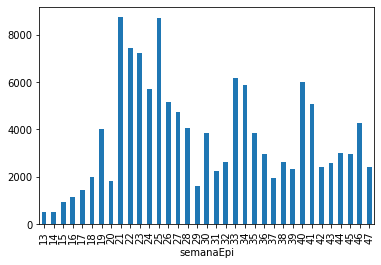

In [9]:
rj.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')

<AxesSubplot:xlabel='data'>

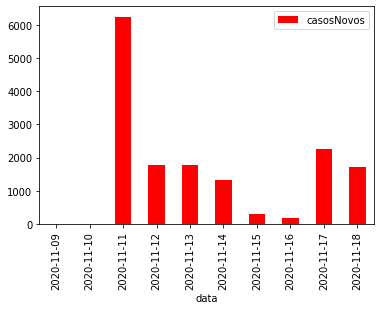

In [10]:
sp = df.query('municipio == "São Paulo"')
sp.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

<AxesSubplot:xlabel='semanaEpi'>

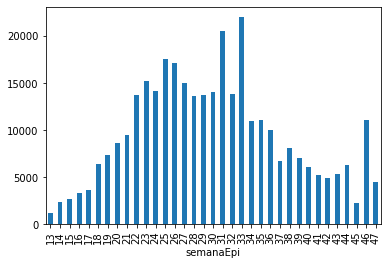

In [11]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')